<h1 style="text-align:center;font-family:serif;font-size:3em;margin:30px">Univariate Linear Regression<h1>

In this notebook, we will develop a univariate linear regression model to predict rental prices based on surface area.

**Import the necessary libraries**

In [23]:
import pandas as pd 
import numpy as np 
import random 
import matplotlib.pyplot as plt 

**Build the model**

In [60]:
def model(X,a,b):
    return a*X+b


def loss(a,b,X,Y):
    m=Y.shape[0]
    Y_predict=a*X+b
    cost=(Y_predict-Y)**2
    return 1/(2*m)*np.sum(cost)


def apprentissage(X, Y, a,b, alpha=0.01, nb_iters=1000):
    m=Y.shape[0]
    it=[5,15,30,50]
    k=0
    s_cout=np.zeros((nb_iters))
    for i in range(nb_iters):
        (temp1, temp2)=a-alpha*(1/m)*np.sum((a*X+b-Y)), a-alpha*(1/m)*np.sum((a*X+b-Y)*X)
        a=temp1
        b=temp2
        s_cout[i]=loss(a,b,X,Y)     
        if i in it:
            x0=np.array([[0],[400]])
            y0=model(x0,a,b)
            plt.figure()  
            plt.scatter(X, Y,label=f"Iteration {i}") 
            plt.plot(x0,y0)
            plt.title(f"Iteration {i}")  
            plt.xlabel('Surface') 
            plt.ylabel('Prix') 
            plt.show()  
            

    plt.plot([i for i in range(nb_iters)],s_cout,"ob")
    plt.title("Loss function")
    plt.xlabel("Number of iterations")
    plt.ylabel("Loss function")
    return a,b

def EvaluationModel(y_true ,y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    mse = np.mean((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2) 
    ss_res = np.sum((y_true - y_pred) ** 2) 
    r2 = 1 - (ss_res / ss_tot)
    print("MAE = ",mae)
    print("MSE = ",mse)
    print("R2 = ",r2)

**Load the data**

In [29]:
df_house=pd.read_csv("datasets/house.csv")
print("first five rows of the  data")
df_house.head()

first five rows of the  data


,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


In [31]:
print("Shape of the data")
print(df_house.shape)

Shape of the data
(545, 2)


**Transform the DataFrame object to an numpy array**

In [34]:
df_house=df_house.to_numpy()

**Split the features and the target variable**

In [37]:
X=df_house[:,1]
Y=df_house[:,0]

**Initialize the model parameters**

In [40]:
a=random.uniform(0, 2)
b=random.uniform(0, 2)
print("Initial model parameters")
print("a=",a)
print("b=",b)

Initial model parameters
a= 1.425098655331359
b= 1.4677174313286891


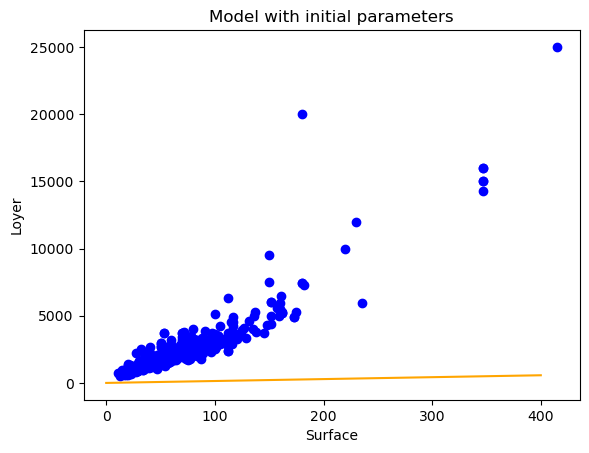

In [42]:
x0=np.array([[0],[400]])
y0=model(x0,a,b)

plt.plot(X,Y,"ob")
plt.plot(x0,y0,color='orange')
plt.title("Model with initial parameters")
plt.xlabel("Surface")
plt.ylabel("Loyer")
plt.show()

**Train the model**

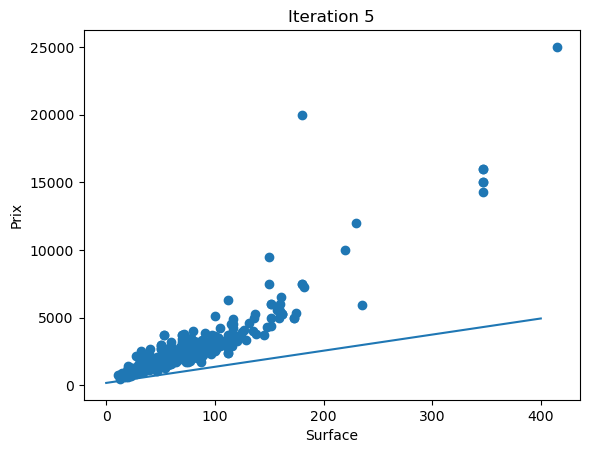

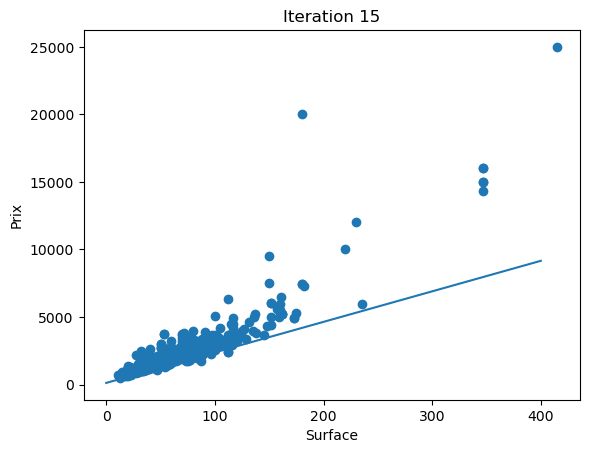

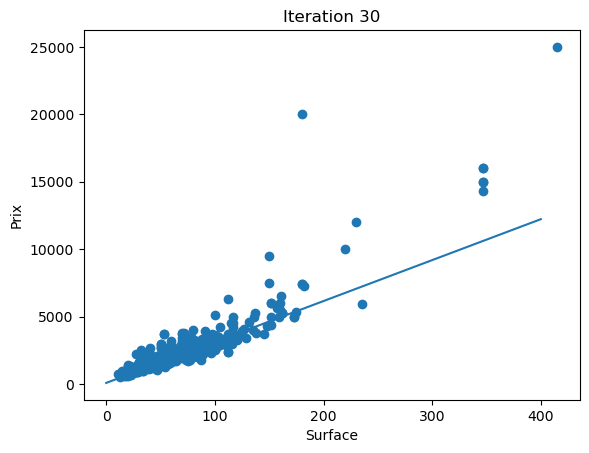

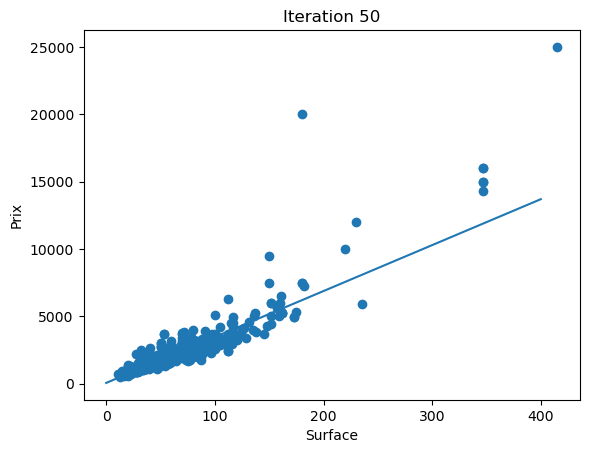

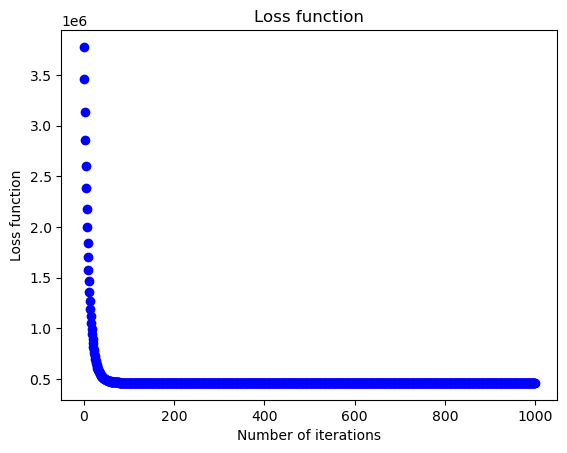

In [45]:
a,b= apprentissage(X, Y, a,b, alpha=0.001, nb_iters=1000)

**Plot the trained model**

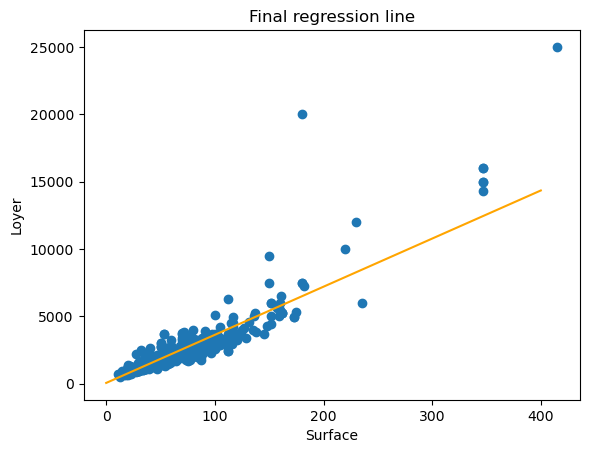

In [210]:
x0=np.array([[0],[400]])
y0=model(x0,a,b)

plt.scatter(X,Y)
plt.plot(x0,y0,color="orange")
plt.title("Final regression line")
plt.xlabel("Surface")
plt.ylabel("Loyer")
plt.show()

**Evaluate the performance of the model**

In [214]:
y_predict=model(X,a,b)
EvaluationModel(Y, y_predict)

MAE =  450.38007559196205
MSE =  925634.6946789593
R2 =  0.8086390282008465


**Use the model for future predictions**

We will use this model for a new prediction. Suppose we want to know the price of a house with an area of 300 units. No house with an area of 300 units exists in the database.

In [74]:
new_surface=300
y=model(np.array([new_surface]),a,b)
print("Price of house have 300 inity of surface is ",y[0])

Price of house have 300 inity of surface is  10766.709430483701


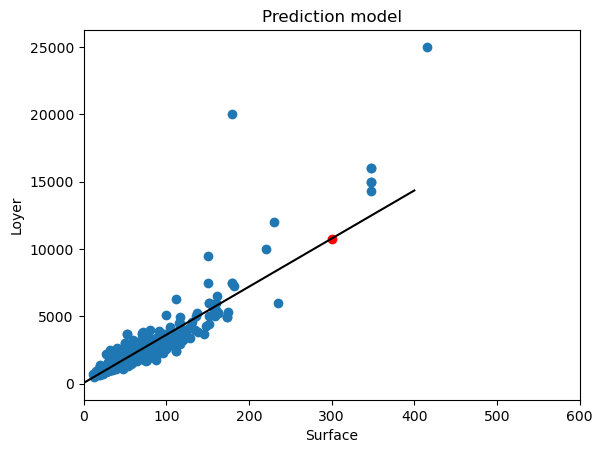

In [76]:
plt.scatter(X, Y)  
plt.plot(x0, y0, color="black") 
plt.scatter(new_surface, y[0], color="red")  
plt.xlim(0, 600)  
plt.title("Prediction model")
plt.xlabel("Surface")
plt.ylabel("Loyer")
plt.show()  

**-------------------------------------------------------------------------------------------END---------------------------------------------------------------------------------------------**